In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = 43018.7

In [3]:
ecc = 0.7
Rp = 30
Ri = 60

M1 = 21.43443725430018
M2 = 2.149774191836287

In [59]:
M = M1 + M2
p = (1 + ecc) * Rp
phi0 = - np.arccos((p/Ri-1)/ecc)
phidot = np.sqrt(G * M * p) / Ri / Ri
rdot = ecc * Ri * Ri / p * np.sin(phi0) * phidot
vphi = Ri * phidot

print('phi0/pi = ', phi0/np.pi)
print('rdot = ', rdot)
print('vphi = ', vphi)

pos1 = np.array([0., 0., 0.])
pos2 = np.array([Ri, 0., 0.])
vel1 = np.array([0., 0., 0.])
vel2 = np.array([rdot, vphi, 0.])

# subtract COM
COM = (M1 * pos1 + M2 * pos2) / (M1 + M2)
COMV = (M1 * vel1 + M2 * vel2) / (M1 + M2)

pos1 -= COM
pos2 -= COM
vel1 -= COMV
vel2 -= COMV

print(vel2)

phi0/pi =  -0.5687423617566031
rdot =  -96.43729951941582
vphi =  119.88729425292352
[-87.64673986 108.95919468   0.        ]


In [54]:
dt = 0.01
Tmax = 12.0
T = 0.0

rdiff = np.linalg.norm(pos2 - pos1)
frc = G * M1 * M2 * (pos2 - pos1) / rdiff**3
acc1 = frc / M1
acc2 = - frc / M2

pos1_list = []
pos2_list = []
Tlist = []

pos1_list.append(pos1)
pos2_list.append(pos2)
Tlist.append(T)

while T < Tmax:
    # First half kick
    vhalf1 = vel1 + acc1 * dt/2.
    vhalf2 = vel2 + acc2 * dt/2.
    
    # Drift
    pos1 = pos1 + vhalf1 * dt
    pos2 = pos2 + vhalf2 * dt
    
    # Force calculation
    rdiff = np.linalg.norm(pos2 - pos1)
    frc = G * M1 * M2 * (pos2 - pos1) / rdiff**3
    acc1 = frc / M1
    acc2 = - frc / M2
    
    # Second half kick
    vel1 = vhalf1 + acc1 * dt/2.
    vel2 = vhalf2 + acc2 * dt/2.
    
    # Advance time.
    T += dt
    
    # Output
    # print(pos1)
    pos1_list.append(pos1)
    pos2_list.append(pos2)
    Tlist.append(T)

pos1_list = np.array(pos1_list)
pos2_list = np.array(pos2_list)
Tlist = np.array(Tlist)


NameError: name 'vel2_list' is not defined

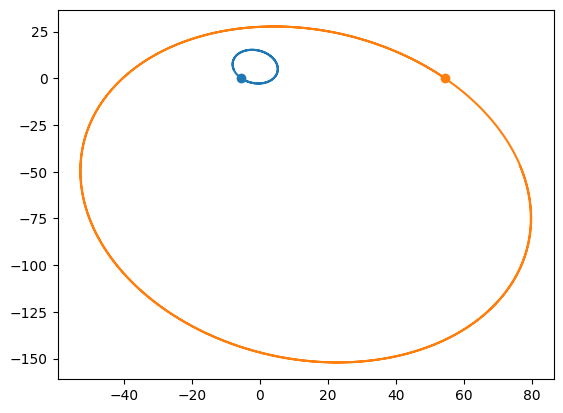

In [58]:
l = plt.plot(pos1_list[:,0], pos1_list[:,1])
plt.scatter(pos1_list[0,0], pos1_list[0,1], c=l[0].get_color())
l = plt.plot(pos2_list[:,0], pos2_list[:,1])
plt.scatter(pos2_list[0,0], pos2_list[0,1], c=l[0].get_color())
print(vel2_list[0])

pericentric =  30.018603252647814
apocentric =  169.979885838355
eccentricity =  0.6998116996875029


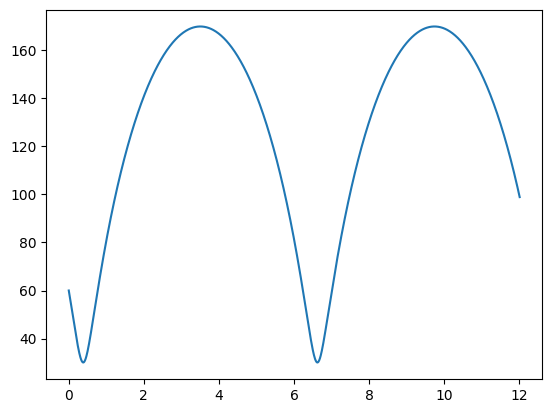

In [52]:
r = np.linalg.norm(pos2_list - pos1_list, axis=1)
plt.plot(Tlist, r)
print('pericentric = ', np.min(r))
print('apocentric = ', np.max(r))
print('eccentricity = ', (np.max(r) - np.min(r)) / (np.max(r) + np.min(r)))